<a href="https://colab.research.google.com/github/MPR-GH/PRLM/blob/master/ch01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



/content/drive/My Drive/Colab Notebooks/ml-notebooks
fatal: destination path 'PRML' already exists and is not an empty directory.
/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
running install
running bdist_egg
running egg_info
writing prml.egg-info/PKG-INFO
writing dependency_links to prml.egg-info/dependency_links.txt
writing requirements to prml.egg-info/requires.txt
writing top-level names to prml.egg-info/top_level.txt
writing manifest file 'prml.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/prml
copying build/lib/prml/__init__.py -> build/bdist.linux-x86_64/egg/prml
creating build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/probability_function.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/discrete.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prm

In [4]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


In [5]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

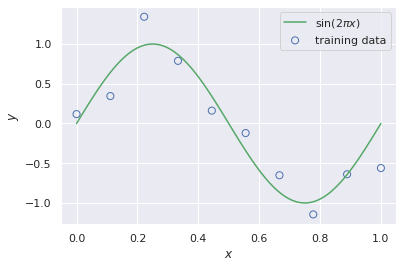

In [7]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Degree - 0
   Weight(s) : 
     [-0.03592087]
   Full Polynomial : 
     y = -0.03592087311169418
Degree - 1
   Weight(s) : 
     [ 0.78301942 -1.63788059]
   Full Polynomial : 
     y = 0.7830194231723844 + -1.637880592568158x^1 
Degree - 3
   Weight(s) : 
     [ 1.13336032e-02  9.29216157e+00 -2.67894422e+01  1.70372865e+01]
   Full Polynomial : 
     y = 0.011333603222680925 + 9.292161573204558x^1  + -26.789442211208684x^2  + 17.03728652095905x^3 
Degree - 6
   Weight(s) : 
     [ 8.70379766e-02 -2.36304892e+00  9.45228619e+01 -4.28174943e+02
  7.36797688e+02 -5.63095549e+02  1.61694460e+02]
   Full Polynomial : 
     y = 0.08703797657243809 + -2.363048917709911x^1  + 94.52286191924347x^2  + -428.17494322673235x^3  + 736.7976875626282x^4  + -563.0955490349781x^5  + 161.6944604312044x^6 
Degree - 9
   Weight(s) : 
     [ 1.17858791e-01 -3.22314291e+01  5.52576193e+02 -2.72857332e+03
  4.76278430e+03  2.03128886e+03 -1.93595365e+04  2.83824707e+04
 -1.78561842e+04  4.24672692e+03]
   

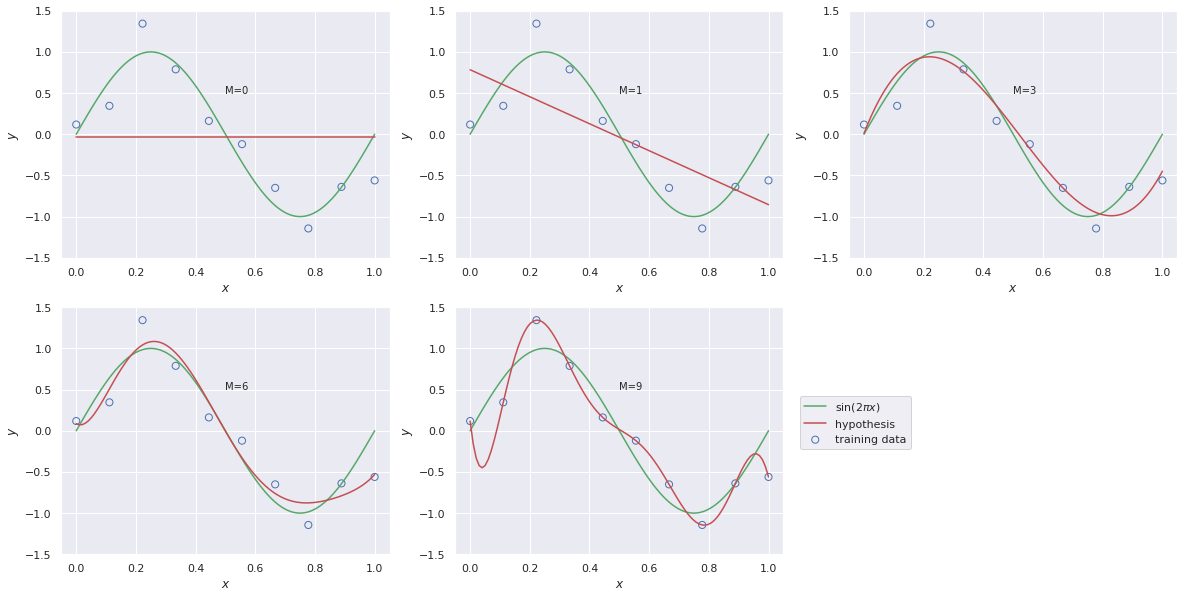

In [55]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0, 1, 3, 6, 9]):
    plt.subplot(2, 3, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    print("Degree - {}".format((degree)))
    print("   Weight(s) : ")
    print("     {}".format(model.w))
    print("   Full Polynomial : ")
    string = str(model.w[0])
    for length in range(1, degree + 1):
      string = string + " + " + str(model.w[length]) + "x^{} ".format(length)

    print("     y = " + string)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(0.5, 0.5))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

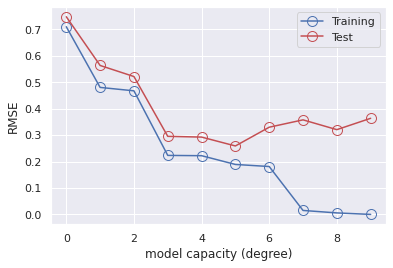

In [8]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

#### Regularization

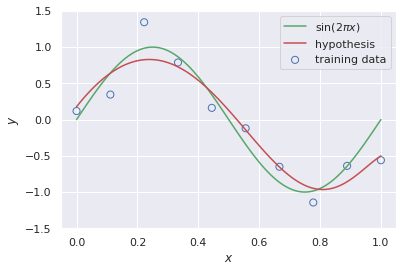

In [54]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

### 1.2.6 Bayesian curve fitting

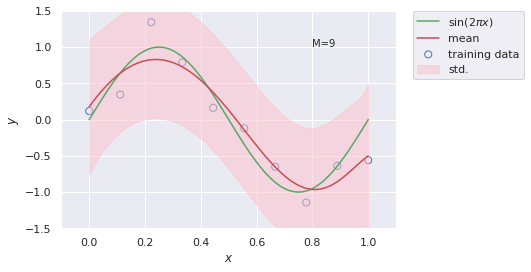

In [10]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()